## k-Nearest Neighbor Algorithm for Classification
---
It is a -
* Non-Parametric
* Lazy Learning
* Instance Based
supervised learning algorithm, which uses a distance metric in order to classify.
* It can also be used for regression.

### Steps
First select a **k**.
* Compute the distance metric between the test data point and all the labeled train data points.
* Order the distances in increasing order, i.e. nearest to farthest.
* Select the top **k** labeled data points and store their labels.
* Take the majority of the labels and assign it to the test data point.

In [10]:
%matplotlib inline
from math import sqrt # in distance calculation
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter # to use most_common function
import seaborn as sns
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
def main():
    data_df = pd.read_csv('data/data.csv')
    new_feature = [7, 4]
    k = int(input("Enter k: "))
    print(f"The Predicted class of {new_feature} is {knn_algorithm(data_df, new_feature, k)}")
    sns.scatterplot(x='x1', y='y1', data=data_df, hue='class', s=150)
    plt.scatter(new_feature[0], new_feature[1], color='y', label='New point', s=100)
    plt.legend(loc = 4, fontsize='small')
    plt.title('Distribution of Points', loc='left');

In [4]:
def knn_algorithm(data_df, new_feature, k):
    distances = []
    neighbors = []
    for d1, d2 in data_df.iterrows():
        distance_of_new_feature = sqrt((d2['x1'] - new_feature[0])**2 + (d2['y1'] - new_feature[1])**2)
        distances.append([distance_of_new_feature, d2['class']])
    distances.sort() # Python automatically sorts lists of lists by the first element.
    k_neighbors = [d[1] for d in distances[:k]] # Only Extract the classes of k-nearest neighbors
    vote = Counter(k_neighbors).most_common(1)[0][0] # Most common returs a Tuple of value and count. We extract the value
    return vote


Enter k: 3
The Predicted class of [7, 4] is 1


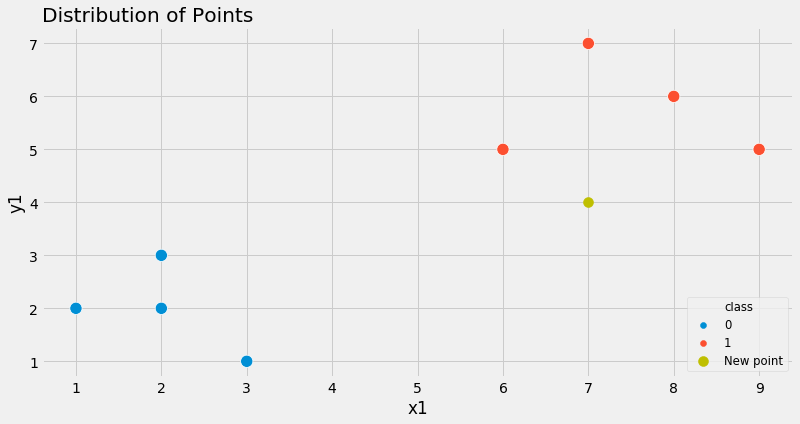

In [11]:
if __name__=='__main__':
    main()